In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
data = pd.read_csv("dataset/Case2-clustering/ALS.csv")
data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
5,6,36,51.0,47.0,46.0,0.009058,-0.118353,37,34.5,27,...,137.0,0.014493,3085,8,8.0,7,0.001812,8.00,6.0,5.0
6,7,55,46.0,44.0,40.0,0.010850,-1.225580,34,24.0,10,...,136.0,0.016275,3551,7,5.0,2,0.009042,9.00,5.0,5.0
7,8,55,45.0,42.0,38.0,0.018519,-0.760417,30,27.5,20,...,139.0,0.015873,3971,5,3.0,2,0.007937,6.00,6.0,6.0
8,9,37,48.0,46.0,41.0,0.012681,-1.010148,35,28.5,24,...,138.0,0.014493,4390,6,3.0,2,0.007246,7.00,6.0,5.0
9,11,72,44.0,42.0,38.0,0.010714,-0.107861,28,25.5,23,...,132.0,0.026643,4772,3,3.0,1,0.003571,7.00,6.0,5.0


/home/farmertian/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


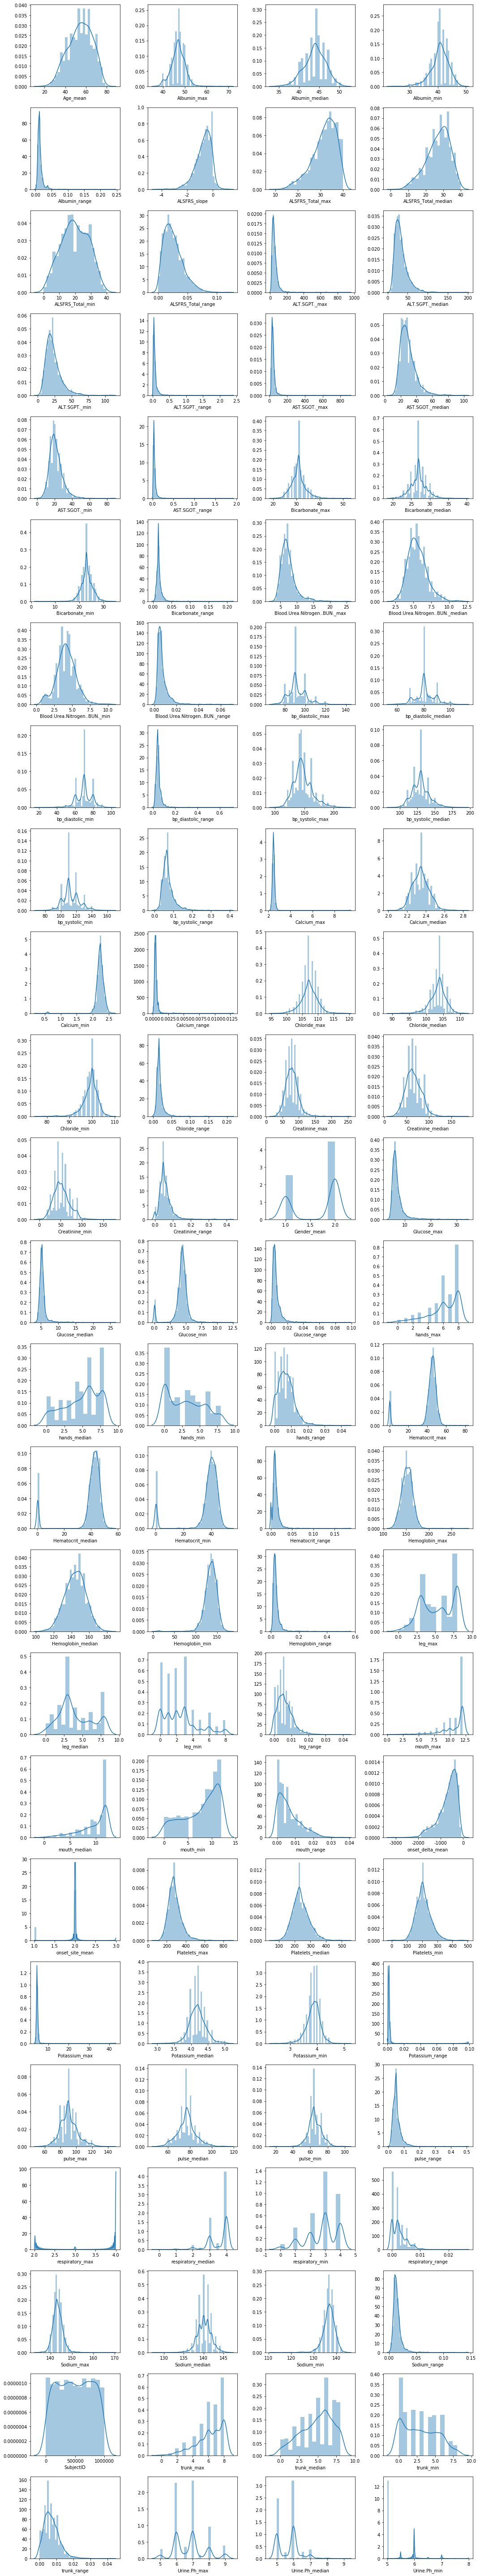

In [3]:
# 数值型数据分布统计
plt.figure(figsize=(15,80))

numeric_cols = data.columns.tolist()[1:]
for i in range(len(numeric_cols)):
    plt.subplot(25, 4, i+1)
    sns.distplot(data[numeric_cols[i]].dropna())
    plt.xlabel(numeric_cols[i])
    
plt.tight_layout()

plt.savefig("data_distribute.png")
plt.show()

In [4]:
# 计算变量间的相关系数，观察变量间的关系
corr_df = data[numeric_cols].corr()
corr_df

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
Age_mean,1.000000,-0.276195,-0.349024,-0.297121,0.053197,-0.015301,0.049054,0.057733,0.041025,0.038163,...,-0.039712,0.080449,0.007046,0.071736,0.089325,0.065092,0.036559,-0.001532,0.002561,-0.008615
Albumin_max,-0.276195,1.000000,0.780141,0.596662,0.223350,0.037438,0.113349,0.090439,0.058077,-0.072609,...,-0.040877,-0.048029,-0.014803,0.080261,0.057346,0.042903,-0.064183,0.075413,-0.046885,-0.138430
Albumin_median,-0.349024,0.780141,1.000000,0.761269,-0.091822,0.059234,0.153280,0.128122,0.099099,-0.099966,...,-0.017818,-0.069380,-0.011740,0.097823,0.084183,0.072317,-0.088370,0.056894,-0.042497,-0.118506
Albumin_min,-0.297121,0.596662,0.761269,1.000000,-0.369015,0.112154,0.158924,0.172940,0.188007,-0.151358,...,0.074240,-0.086457,-0.010308,0.095974,0.113639,0.134409,-0.114685,0.034555,-0.001877,-0.049783
Albumin_range,0.053197,0.223350,-0.091822,-0.369015,1.000000,-0.226123,-0.142900,-0.166473,-0.188223,0.264209,...,0.020971,0.177163,-0.002803,-0.086105,-0.110648,-0.124018,0.211769,-0.011823,0.038553,0.022866
ALSFRS_slope,-0.015301,0.037438,0.059234,0.112154,-0.226123,1.000000,0.039156,0.247250,0.601810,-0.819305,...,0.029528,-0.154524,0.018507,0.031517,0.184289,0.488530,-0.686407,-0.037779,-0.064897,-0.032226
ALSFRS_Total_max,0.049054,0.113349,0.153280,0.158924,-0.142900,0.039156,1.000000,0.874428,0.623526,-0.083222,...,-0.024769,-0.103516,0.007739,0.845598,0.779836,0.590336,-0.022388,-0.034254,-0.031396,-0.024381
ALSFRS_Total_median,0.057733,0.090439,0.128122,0.172940,-0.166473,0.247250,0.874428,1.000000,0.814057,-0.375725,...,-0.005976,-0.104691,0.001079,0.741941,0.850799,0.729634,-0.252393,-0.072189,-0.038370,-0.012939
ALSFRS_Total_min,0.041025,0.058077,0.099099,0.188007,-0.188223,0.601810,0.623526,0.814057,1.000000,-0.737255,...,0.077687,-0.128440,0.023067,0.518884,0.667215,0.845515,-0.549288,-0.089458,-0.024922,0.015520
ALSFRS_Total_range,0.038163,-0.072609,-0.099966,-0.151358,0.264209,-0.819305,-0.083222,-0.375725,-0.737255,1.000000,...,-0.023119,0.200719,-0.007788,-0.053598,-0.258051,-0.576628,0.815212,0.043252,0.079291,0.042291


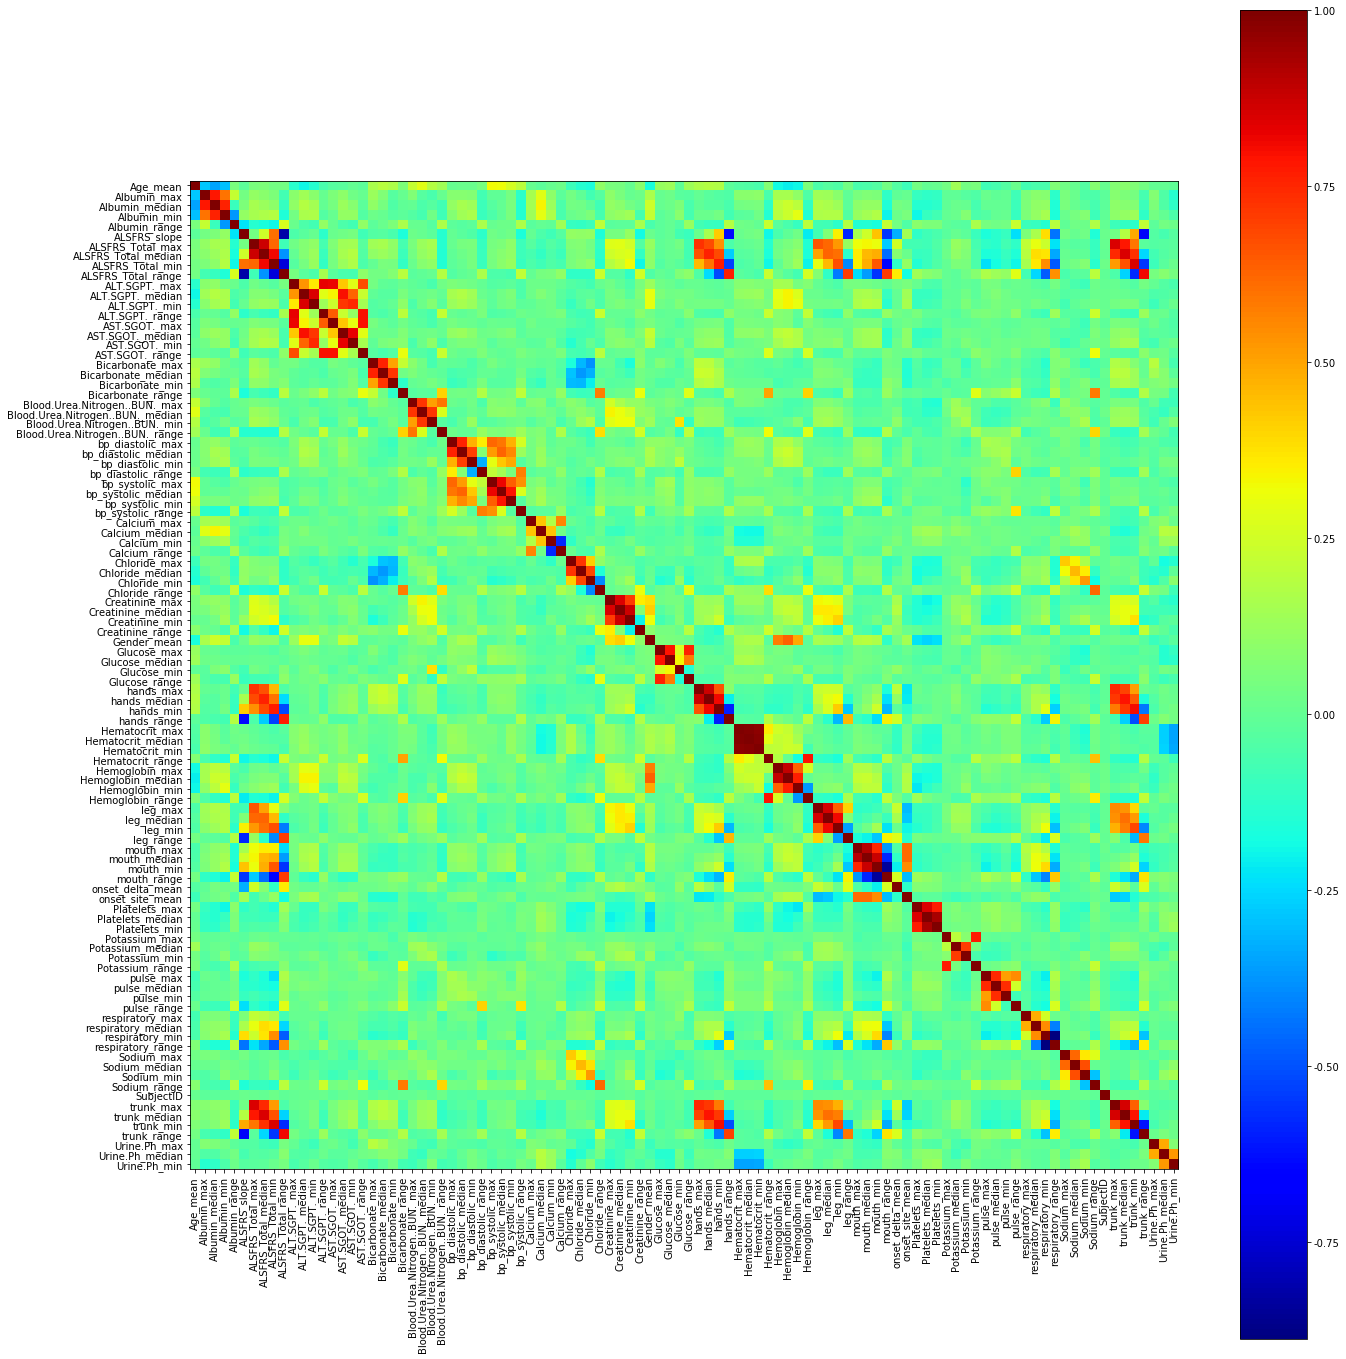

In [5]:
# 作图_相关性分析
plt.figure(figsize=(20, 20))

# 关闭格子线 (grid line)
ax = plt.gca()
ax.grid(False)

plt.imshow(corr_df, cmap='jet')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation='vertical')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.tight_layout()

plt.savefig("data_corr.png")
plt.show()

In [6]:
# 删除相关性较强的特征,删除无关特征'ID','SubjectID'
col_min_max_range = [c for c in data.columns if c.lower()[-3:]=='max' or c.lower()[-3:]=='min' or c.lower()[-5:]=='range']
data_kmeans = data.drop(columns = col_min_max_range)
data_kmeans = data_kmeans.drop(columns = 'ID')
data_kmeans = data_kmeans.drop(columns = 'SubjectID')

data_kmeans

,Age_mean,Albumin_median,ALSFRS_slope,ALSFRS_Total_median,ALT.SGPT._median,AST.SGOT._median,Bicarbonate_median,Blood.Urea.Nitrogen..BUN._median,bp_diastolic_median,bp_systolic_median,...,mouth_median,onset_delta_mean,onset_site_mean,Platelets_median,Potassium_median,pulse_median,respiratory_median,Sodium_median,trunk_median,Urine.Ph_median
0,65,40.5,-0.965608,28.0,22.0,27.5,28.0,7.11945,83.0,139.0,...,3.5,-1023,1,169.0,4.25,68.0,3.0,145.5,7.0,6.0
1,48,41.0,-0.921717,33.0,13.0,17.0,28.0,4.74630,78.0,132.5,...,8.0,-341,1,264.0,4.30,76.0,4.0,138.0,7.0,5.0
2,38,47.0,-0.914787,14.0,20.0,19.0,29.0,4.38120,76.0,110.0,...,7.0,-1181,1,213.0,4.00,73.0,4.0,143.0,0.0,5.0
3,63,44.0,-0.598361,29.0,60.0,40.0,20.0,8.03220,80.0,130.0,...,12.0,-365,2,233.0,4.20,72.0,3.0,139.0,5.0,6.0
4,63,45.5,-0.444039,27.5,26.5,26.5,28.0,4.19865,80.0,130.0,...,12.0,-1768,2,283.5,3.75,96.0,4.0,140.0,4.0,5.0
5,36,47.0,-0.118353,34.5,23.0,26.0,26.0,5.11140,80.0,115.0,...,8.0,-334,1,194.0,4.30,66.0,4.0,141.0,8.0,6.0
6,55,44.0,-1.225580,24.0,46.0,37.0,27.5,5.47650,86.0,126.0,...,6.0,-268,2,224.5,4.10,80.0,3.0,141.5,5.0,5.0
7,55,42.0,-0.760417,27.5,27.0,25.0,28.0,4.01610,74.0,116.0,...,12.0,-763,2,330.0,4.50,80.0,4.0,144.0,3.0,6.0
8,37,46.0,-1.010148,28.5,42.0,30.0,29.0,6.40000,80.0,127.5,...,12.0,-440,2,124.0,4.30,68.0,4.0,142.0,3.0,6.0
9,72,42.0,-0.107861,25.5,20.0,24.0,29.5,6.78000,80.0,125.0,...,12.0,-1324,2,359.0,3.70,100.0,4.0,137.0,3.0,6.0


In [7]:
# 查询是否有空缺值
num_of_nan = data_kmeans.isna().sum()
num_of_nan

Age_mean                            0
Albumin_median                      0
ALSFRS_slope                        0
ALSFRS_Total_median                 0
ALT.SGPT._median                    0
AST.SGOT._median                    0
Bicarbonate_median                  0
Blood.Urea.Nitrogen..BUN._median    0
bp_diastolic_median                 0
bp_systolic_median                  0
Calcium_median                      0
Chloride_median                     0
Creatinine_median                   0
Gender_mean                         0
Glucose_median                      0
hands_median                        0
Hematocrit_median                   0
Hemoglobin_median                   0
leg_median                          0
mouth_median                        0
onset_delta_mean                    0
onset_site_mean                     0
Platelets_median                    0
Potassium_median                    0
pulse_median                        0
respiratory_median                  0
Sodium_media

/home/farmertian/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


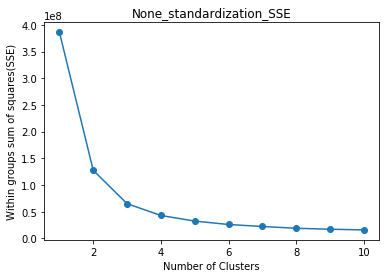

In [8]:
# Elbow 方法判断聚类类簇个数
distortions = [] #用来存放设置不同簇数时的SSE值
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(data_kmeans)
    distortions.append(km.inertia_) # 获取K-means算法的SSE
    
#绘制曲线
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within groups sum of squares(SSE)")
plt.title("None_standardization_SSE")

plt.savefig("None_standardization_SSE.png")
plt.show()

/home/farmertian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/farmertian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


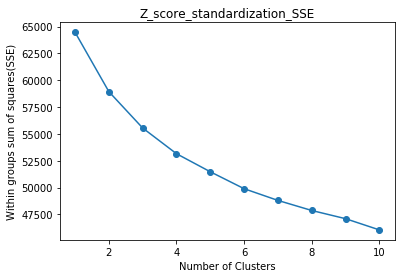

In [9]:
# Z标准化 Elbow 方法判断聚类类簇个数
z_score= preprocessing.StandardScaler().fit(data_kmeans)
z_score_data_kmeans=z_score.transform(data_kmeans)
z_score_distortions = [] #用来存放设置不同簇数时的SSE值
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(z_score_data_kmeans)
    z_score_distortions.append(km.inertia_) # 获取K-means算法的SSE
    
#绘制曲线
plt.plot(range(1,11),z_score_distortions,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within groups sum of squares(SSE)")
plt.title("Z_score_standardization_SSE")

plt.savefig("Z_score_standardization_SSE.png")
plt.show()

/home/farmertian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


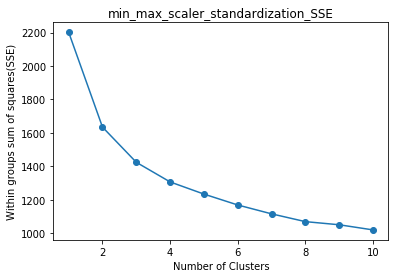

In [10]:
# 最大最小归一化 Elbow 方法判断聚类类簇个数
min_max_scaler= preprocessing.MinMaxScaler().fit(data_kmeans)
min_max_scaler_data_kmeans=min_max_scaler.transform(data_kmeans)
min_max_scaler_distortions = [] #用来存放设置不同簇数时的SSE值
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(min_max_scaler_data_kmeans)
    min_max_scaler_distortions.append(km.inertia_) # 获取K-means算法的SSE
    
#绘制曲线
plt.plot(range(1,11),min_max_scaler_distortions,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within groups sum of squares(SSE)")
plt.title("min_max_scaler_standardization_SSE")

plt.savefig("min_max_scaler_standardization_SSE.png")
plt.show()

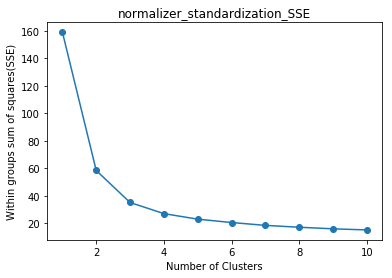

In [11]:
# 正则化 Elbow 方法判断聚类类簇个数
normalizer_scaler= preprocessing.Normalizer().fit(data_kmeans)
normalizer_data_kmeans=normalizer_scaler.transform(data_kmeans)
normalizer_distortions = [] #用来存放设置不同簇数时的SSE值
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(normalizer_data_kmeans)
    normalizer_distortions.append(km.inertia_) # 获取K-means算法的SSE
    
#绘制曲线
plt.plot(range(1,11),normalizer_distortions,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within groups sum of squares(SSE)")
plt.title("normalizer_standardization_SSE")

plt.savefig("normalizer_standardization_SSE.png")
plt.show()

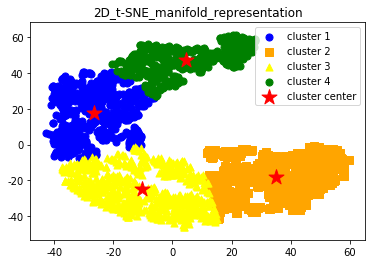

In [12]:
# TSNE 聚类结果展示
tsne = TSNE().fit_transform(normalizer_data_kmeans)

km = KMeans(n_clusters=4)    #y_km中保存了聚类的结果    
y_km = km.fit_predict(tsne)    #绘制不同簇的点    

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="blue",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="orange",marker="s",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="yellow",marker="^",label="cluster 3") 
plt.scatter(tsne[y_km==3,0],tsne[y_km==3,1],s=50,c="green",marker="o",label="cluster 4")     
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center") #绘制簇的中心点  
plt.title("2D_t-SNE_manifold_representation")
plt.legend()    

plt.savefig("2D_t-SNE_manifold_representation.png")
plt.show()
